<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Linear_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Useful Functions
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [0]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dependence of Artificial Variables
##a. Finding Variance, Covariance, and Correlation I

By reading the matrix output from the `np.cov()` and `np.corrcoef() `functions, find the variance of the variables A
and B and the covariance and correlation of their relationship.

In [3]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

covm = np.cov(A, B)
corrm = np.corrcoef(A, B)

print ('Covariance matrix: \n' + str(covm) + '\n')
print ('Correlation matrix: \n' + str(corrm) + '\n')

print ('Variance of A: ' + str(covm[0,0]))
print ('Variance of B: ' + str(covm[1,1]) + '\n')

print ('Covariance of A and B: ' + str(covm[1,0]))
print ('Correlation of A and B: ' + str(corrm[1,0]))

Covariance matrix: 
[[ 0.074023   -0.22181858]
 [-0.22181858  0.66999476]]

Correlation matrix: 
[[ 1.        -0.9960448]
 [-0.9960448  1.       ]]

Variance of A: 0.07402299831418033
Variance of B: 0.6699947585802903

Covariance of A and B: -0.2218185754711069
Correlation of A and B: -0.9960448014911548


# Finding Variance, Covariance, and Correlation II

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables C
and D and the covariance and correlation of their relationship.

In [4]:
C = np.random.rand(100)
D = np.random.normal(0, 0.5, 100)

covm = np.cov(C, D)
corrm = np.corrcoef(C, D)

print ('Covariance matrix: \n' + str(covm) + '\n')
print ('Correlation matrix: \n' + str(corrm) + '\n')

print ('Variance of C: ' + str(covm[0,0]))
print ('Variance of D: ' + str(covm[1,1]) + '\n')

print ('Covariance of C and D: ' + str(covm[1,0]))
print ('Correlation of C and D: ' + str(corrm[1,0]))

Covariance matrix: 
[[0.0887617  0.00525044]
 [0.00525044 0.29778715]]

Correlation matrix: 
[[1.         0.03229458]
 [0.03229458 1.        ]]

Variance of C: 0.08876170167100861
Variance of D: 0.2977871468845068

Covariance of C and D: 0.005250436161312912
Correlation of C and D: 0.03229457683204365


#Constructing Example Relationships
##a. Positive Correlation Example

Construct a variable Y
which has a strong, but not perfect, positive correlation with X (0.9<Corr(X,Y)<1), and plot their relationship.

Correlation of X and Y: 0.9843628012992833


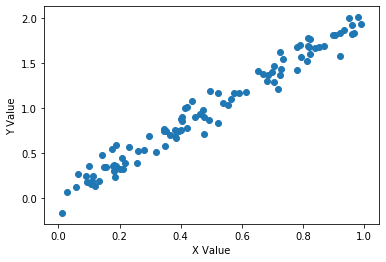

In [6]:
X = np.random.rand(100)

Y = 2*X + np.random.normal(0, 0.1, 100)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation of X and Y: ' + str(np.corrcoef(X, Y)[0,1]))

#Negative Correlation Example

Construct a variable W
which has a weak, negative correlation with Z (−0.3<Corr(Z,W)<0), and plot their relationship.

Correlation of Z and W: 0.021294675951341775


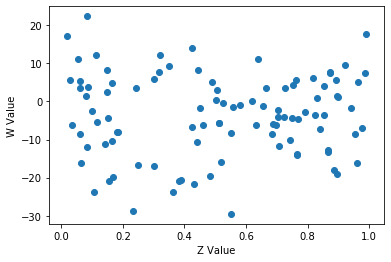

In [8]:
Z = np.random.rand(100)

W = -4*Z + np.random.normal(0, 10, 100)

plt.scatter(Z,W)
plt.xlabel('Z Value')
plt.ylabel('W Value')

print ('Correlation of Z and W: ' + str(np.corrcoef(Z, W)[0,1]))


#Correlation of Real Assets
##a. Finding Correlation of Real Assets

Find the correlation between the stocks OKE and LAKE. Also check how they correlate with the provided benchmark.

In [0]:
OKE = get_pricing('OKE', fields='price', start_date='2013-01-01', end_date='2015-01-01')
LAKE = get_pricing('LAKE', fields='price', start_date='2013-01-01', end_date='2015-01-01')
benchmark = get_pricing('SPY', fields='price', start_date='2013-01-01', end_date='2015-01-01')

print ("Correlation coefficient of OKE and LAKE: ", np.corrcoef(OKE, LAKE)[0,1])
print ("Correlation coefficient of OKE and benchmark: ", np.corrcoef(OKE, benchmark)[0,1])
print ("Correlation coefficient of LAKE and benchmark: ", np.corrcoef(LAKE, benchmark)[0,1])



```
Correlation coefficient of OKE and LAKE:  0.446484870844
Correlation coefficient of OKE and benchmark:  0.853638499475
Correlation coefficient of LAKE and benchmark:  0.625923407419
```



#Finding Correlated Pairs

Find the most correlated pair of stocks in the following portfolio using 2015 pricing data and the `find_most_correlated` function defined in the Helper Functions section above.

In [0]:
symbol_list = ['GSK', 'SNOW', 'FB', 'AZO', 'XEC', 'AMZN']
data = get_pricing(symbol_list, fields=['price']
                               , start_date='2015-01-01', end_date='2016-01-01')['price']
data.columns = symbol_list

find_most_correlated(data)

`(('FB', 'AMZN'), 0.95751089566007552)`

#Limitations of Correlation
##a. Out of Sample Tests

Using pricing data from the first half of 2016, find the correlation coefficient between FB and AMZN and compare it to the strong positive relationship predicted from the 2015 correlation coefficient to see if that result holds.

In [0]:
FB_15 = get_pricing('FB', fields='price', start_date='2015-01-01', end_date='2016-01-01')
AMZN_15 = get_pricing('AMZN', fields='price', start_date='2015-01-01', end_date='2016-01-01')
FB_16 = get_pricing('FB', fields='price', start_date='2016-01-01', end_date='2016-07-01')
AMZN_16 = get_pricing('AMZN', fields='price', start_date='2016-01-01', end_date='2016-07-01')

print ("2015 correlation coefficient: ", np.corrcoef(FB_15, AMZN_15)[0,1])
print ("2016 correlation coefficient: ", np.corrcoef(FB_16, AMZN_16)[0,1])
print ("The strong correlation from 2015 did not hold outside of the 2015 pricing sample.")



```
2015 correlation coefficient:  0.95751089566
2016 correlation coefficient:  0.651288727673
The strong correlation from 2015 did not hold outside of the 2015 pricing sample.
```



#Rolling Correlation

Plot the 60-day rolling correlation coefficient between FB and AMZN to make a conclusion about the stability of their relationship.

In [0]:
FB = get_pricing('FB', fields='price', start_date='2015-01-01', end_date='2017-01-01')
AMZN = get_pricing('AMZN', fields='price', start_date='2015-01-01', end_date='2017-01-01')

rolling_correlation = FB.rolling(window=60).corr(AMZN)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
print ("Upon further investigation, FB and AMZN do not consistently have the strong correlation suggested by our result from question 3b.")


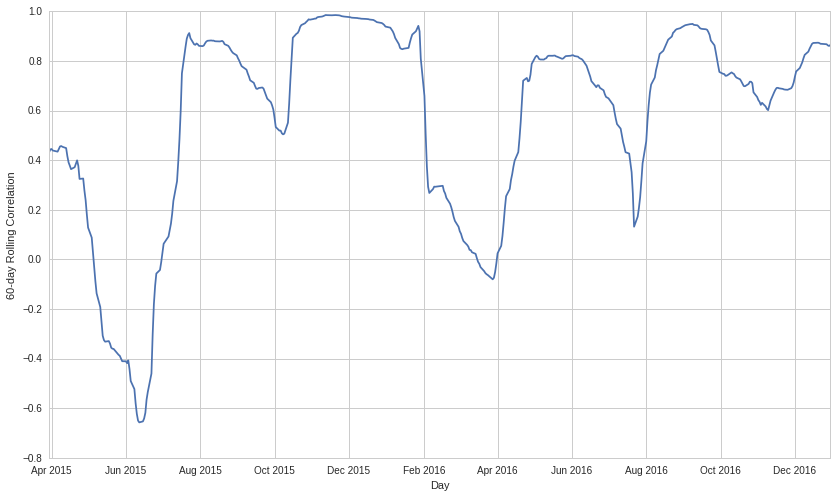

Upon further investigation, FB and AMZN do not consistently have the strong correlation suggested by our result from question 3b.